# Isotropic linear elasticity

In [2]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from simcoon import simmit as sim
import os
from IPython.display import HTML
dir = os.path.dirname(os.path.realpath('__file__'))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In thermoelastic isotropic materials three parameters are required: 
      
1. The Young modulus $E$,
2. The Poisson ratio $\nu$,
3. The coefficient of thermal expansion $\alpha$.

The elastic stiffness tensor and the thermal expansion coefficients tensor are written in the Voigt notation formalism as

$$\boldsymbol{L}=\left(\begin{matrix} L_{1111} & L_{1122} & L_{1122} & 0 & 0 & 0 \\ L_{1122} & L_{1111} & L_{1122} & 0 & 0 & 0 \\ L_{1122} & L_{1122} & L_{1111} & 0 & 0 & 0 \\ 0 & 0 & 0 & L_{1212} & 0 & 0 \\ 0 & 0 & 0 & 0 & L_{1212} & 0 \\ 0 & 0 & 0 & 0 & 0 & L_{1212} \end{matrix}\right), \quad \boldsymbol{\alpha}=\left(\begin{matrix} \alpha & 0 & 0 \\ 0 & \alpha & 0 \\ 0 & 0 & \alpha \end{matrix}\right),$$

with 
$$L_{1111}=\frac{E(1-\nu)}{(1+\nu)(1-2\nu)}, \quad L_{1122}=\frac{E\nu}{(1+\nu)(1-2\nu)}, \quad L_{1212}=\frac{E}{2(1+\nu)}.$$

Details on the the elastic stiffness tensor of isotropic media can be found in Lai et al 2010. The tangent stiffness tensor in this case is $\boldsymbol{L}^t=\boldsymbol{L}$. Moreover, the increment of the elastic strain is given by

$$\Delta\varepsilon^{\textrm{el}}_{ij}=\Delta\varepsilon^{\textrm{tot}}_{ij}-\alpha\Delta T\delta_{ij},$$

where $\delta_{ij}$ implies the Kronecker delta operator. In the 1D case only one component of stress is computed, through the relation 

$$\sigma^{\textrm{fin}}_{11}=\sigma^{\textrm{init}}_{11}+E\Delta\varepsilon^{\textrm{el}}_{11}.$$

In the plane stress case only three components of stress are computed, through the relations 

$$\left(\begin{matrix} \sigma^{\textrm{fin}}_{11} \\ \sigma^{\textrm{fin}}_{22} \\ \sigma^{\textrm{fin}}_{12} \end{matrix}\right) =\left(\begin{matrix} \sigma^{\textrm{init}}_{11} \\ \sigma^{\textrm{init}}_{22} \\ \sigma^{\textrm{init}}_{12} \end{matrix}\right)+\frac{E}{1-\nu^2} \left(\begin{matrix} 1 & \nu & 0 \\ \nu & 1 & 0 \\ 0 & 0 & \frac{1-\nu}{2} \end{matrix}\right) \left(\begin{matrix} \Delta\varepsilon^{\textrm{el}}_{11} \\ \Delta\varepsilon^{\textrm{el}}_{22} \\ 2\Delta\varepsilon^{\textrm{el}}_{12} \end{matrix}\right).$$

In the generalized plane strain/3D analysis case the stress tensor is computed through the relation
$$\sigma^{\textrm{fin}}_{ij}=\sigma^{\textrm{init}}_{ij}+L_{ijkl}~\Delta\varepsilon^{\textrm{el}}_{kl}.$$

In [3]:
umat_name = 'ELISO' #This is the 5 character code for the elastic-isotropic subroutine
nstatev = 1 #The number of scalar variables required, only the initial temperature is stored here

rho = 4.4
c_p = 0.656
E = 70000.
nu = 0.2
alpha = 1.E-5

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.
solver_type = 0

props = np.array([rho, c_p, E, nu, alpha])

path_data = 'data'
path_results = 'results'
pathfile = 'path.txt'
outputfile = 'results_ELISO.txt'

sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, path_data, path_results, pathfile, outputfile)

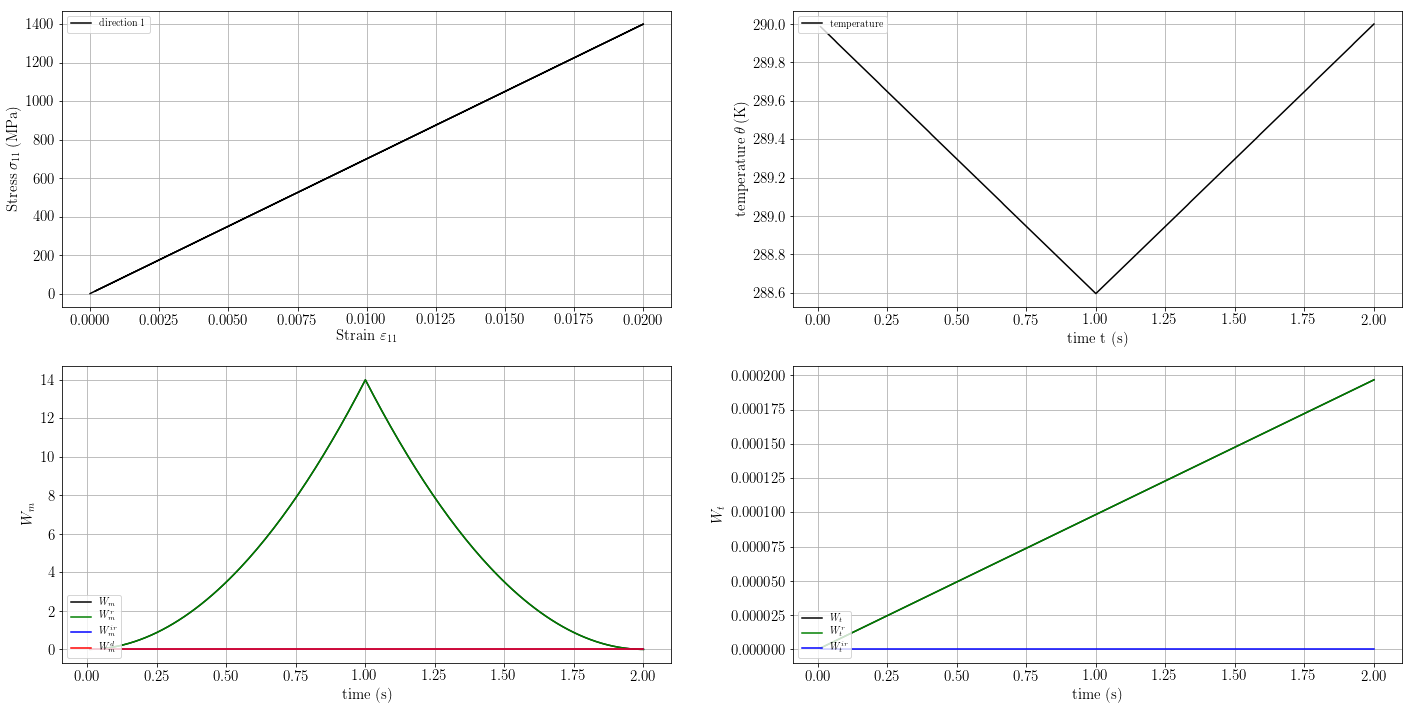

In [5]:
fig = plt.figure()
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size
outputfile_macro = dir + '/' + path_results + '/results_ELISO_global-0.txt'

#Get the data
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_macro, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time, T, Q, r = np.loadtxt(outputfile_macro, usecols=(4,5,6,7), unpack=True)
Wm, Wm_r, Wm_ir, Wm_d, Wt, Wt_r, Wt_ir = np.loadtxt(outputfile_macro, usecols=(20,21,22,23,24,25,26), unpack=True)

#Plot the results
ax = fig.add_subplot(2, 2, 1)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Strain $\varepsilon_{11}$', size = 15)
plt.ylabel(r'Stress $\sigma_{11}$\,(MPa)', size = 15)
plt.plot(e11,s11, c='black', label='direction 1')
plt.legend(loc=2)

ax = fig.add_subplot(2, 2, 2)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time t (s)', size = 15)
plt.ylabel(r'temperature $\theta$\,(K)',size = 15)
plt.plot(time,T, c='black', label='temperature')
plt.legend(loc=2)

ax = fig.add_subplot(2, 2, 3)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (s)', size = 15)
plt.ylabel(r'$W_m$',size = 15)
plt.plot(time,Wm, c='black', label=r'$W_m$')
plt.plot(time,Wm_r, c='green', label=r'$W_m^r$')
plt.plot(time,Wm_ir, c='blue', label=r'$W_m^{ir}$')
plt.plot(time,Wm_d, c='red', label=r'$W_m^d$')
plt.legend(loc=3)

ax = fig.add_subplot(2, 2, 4)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (s)', size = 15)
plt.ylabel(r'$W_t$',size = 15)
plt.plot(time,Wt, c='black', label=r'$W_t$')
plt.plot(time,Wt_r, c='green', label=r'$W_t^r$')
plt.plot(time,Wt_ir, c='blue', label=r'$W_t^{ir}$')
plt.legend(loc=3)

plt.show()